**Лабораторын ажил 10: Network Dynamics**   

**B221910007 Г.Тэмүүлэн**

Энэ долоо хоногийн лабораторын ажлаар бид динамик сүлжээний загварчлал ба
шинжилгээний талаар эхний чухал ойлголтуудыг судлах, кодчилох болно.

Note: Уг нотебүүк нь 100 хувь болон гүйцэт биш бөгөөд цаашид нэмэн судлахад
шаардлагатай зөвхөн анхан шатны ойлголтуудыг багтаасан болно.


**DyNetX: динамик сүлжээг загварчлахад зориулагдсан сан**

Бид өнгөрсөн хичээлүүд дээр статик сүлжээний топологийг судалсан. Гэхдээ бодит
амьдрал дээр сүлжээнд оролцогчид үүсэж, зарим тохиолдолд алга болж, заримдаа
холбогдох буюу харилцаа үүсгэж, зарим тохиолдолд харилцан хамаарал нь үгүй болж
байдаг. Өөрөөр хэлбэл цаг хугацаа өнгөрөхөд зангилаа болон холбоосууд нэмэгдэж, зарим
тохиолдолд устдаг. Энэ нь сүлжээний бүтэц болон холбоост байдалд ихээр нөлөөлдөг.
Тухайлбал, топологийн өөрчлөлт нь тархах үзэгдэлд ашиглагдана.
DyNetx нь цаг хугацаанаас хамаарч хувьсан өөрчлөгддөг графуудыг загварлахад
ашиглагддаг. Дараах хэсэгт бид DyNetx санг ашиглан динамик сүлжээнүүдийг байгуулах
болон түүн дээр шинжилгээ хийхэд шаардлагатай чухал ойлголтуудыг тайлбарлана.
Динамик сүлжээ нь таймстамп буюу цагийн үечлэлүүдэд ирмэг, оройнууд холбогдон үүсэх
топологи юм. Жишээг дараах зурагнаас харна уу.


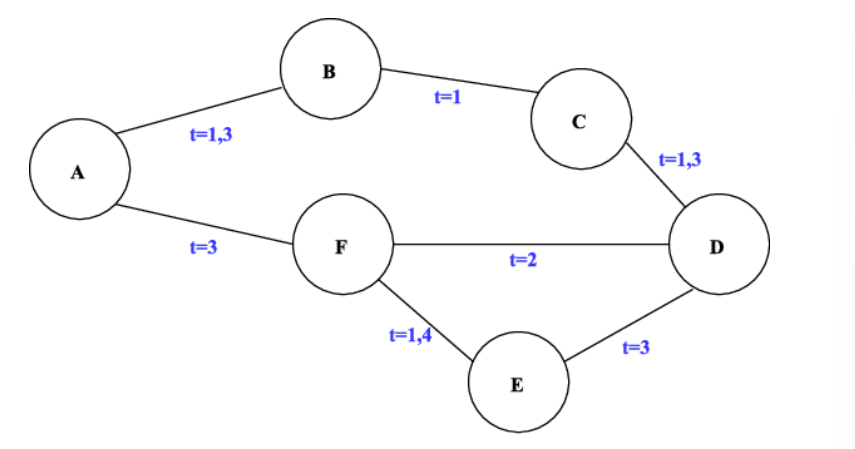

DyNetx нь a Python хэлний нэмэлт сан бөгөөд өмнө ашиглаж байсан networkx сангийн
динамик сүлжээг загварчлах зориулж өргөтгөсөн хувилбар юм. Уг сан нь энэ төрлийн
сүлжээнд ажиллах алгоритмуудыг агуулна.
Зарим судлаачид DyNetx -ийг NDlib -ийг дэмжих нэмэлт санг болгон хөгжүүлсэн. Энэ нь
динамик сүлжээний топологийн генерик хөгжүүлэлтийг хийх боломжийг олгодог бөгөөд
чиглэлт болон чиглэлт бус графууд дээр ажиллана.

  - Snapshot Graphs
  - Interaction Networks

Дараах коммандын тусламжтайгаар сангаа суулгана уу.

In [ ]:
pip install dynetx

# Snapshot Graphs (to top)

Ер нь сүлжээний түүхэд тодорхой хугацаанд сүлжээг ажиглаад өөрчлөлтүүдийг нэгтгэн t хугацааны агшинд сүлжээний төлөв, шинжүүдийг агуулсан байдлаар нэг снапсот граф болгон хуваадаг. Томьёолбол,

  - A Snapshot Graph  Gt  is defined by a temporally ordered set  ⟨G1,G2…Gt⟩  of static graphs where each snapshot  Gi=(Vi,Ei)  is univocally identified by the sets of nodes  Vi  and edges  Ei .
  - Снапсот граф  Gt  нь хугацааны хувьд эрэмбэлэгдсэн графуудын олонлог буюу  ⟨G1,G2…Gt⟩  бөгөөд эдгээр нь статик графууд байх ба орой  Vi  болон ирмэгүүдийн  Ei  олонлогоос бүрдсэн граф  Gi=(Vi,Ei)  болно.

Network snapshots can be effectively used, for instance, to model a phenomenon that generates network perturbations (almost) at regular intervals. In this scenario, context-dependent temporal windows are used to partition the network history into consecutive snapshots: time-bounded observations describing a precise, static, discretization of the network life.

Considering our dynamic network example we can identify the following snapshot graphs:

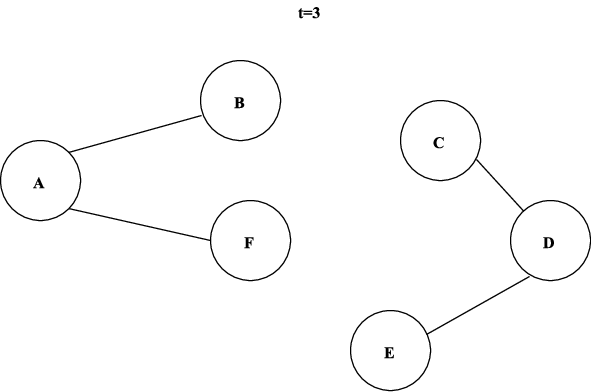

DyNetx allows to (among the other things):

  - List the snapshots of the loaded graph

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at /content/drive


**Interaction networks - Харилцан хамаарлыг харуулсан сүлжээнүүд (to top)**

Interaction network загвар нь цаг хугацаа өнгөрөхөд оройнууд болон ирмэгүүдийн аль аль нь бий болох эсвэл устахад динамик бүтэцд өөрчлөлт орно гэж үздэг. Ихэвчлэн, Intercation network -ийг үүсгэхдээ t хугацаануудыг нэгтгэх оруулах замаар авч үздэг ба ирмэгүүд стрийм байдлаар тасралтгүй нэмэгдэхээр загварчилдаг.


An interaction network is a graph  G=(V,E,T)  where:  V  is a set of triplets of the form  (v,ts,te) , with  v  a vertex of the graph and  ts ,  te∈T  are respectively the birth and death timestamps of the corresponding vertex (with  ts≤te );  E  is a set of quadruplets  (u,v,ts,te) , with  u,v∈V  are vertices of the graph and  ts,te∈T  are respectively the birth and death timestamps of the corresponding edge (with  ts≤te ).

Дараах байдлаар динамик сүлжээгээ үүссэн гэж авч үзье.

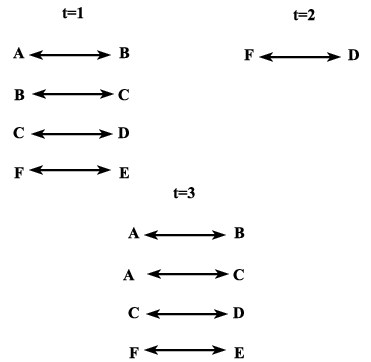

DyNetx allows to to obtain the edge stream of a given dynamic graph.

In [ ]:
pip install dynetx

In [ ]:
import dynetx as dn
import networkx as nx
import random

def read_net(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_edge(l[0], l[1])
    return g

g = dn.DynGraph() # empty dynamic graph

**Динамик сүлжээг үүсгэх**

Нэг динамик сүлжээг ирмэгүүдийг нэмэх замааар үүсгэлээ. Жишээлбэл, 10 ER графуудыг үүсгэсэн ба энэ нь ижилхэн динамик системийн ялгаатай ялгаатай топологиудыг илэрхийлнэ.

In [ ]:
for t in range(1, 9):
    er = read_net(f'../data/asoiaf-all-edges.csv')#nx.erdos_renyi_graph(random.randint(100, 400), 0.05)
    g.add_interactions_from(er.edges, t=t)

Бид снапшотын ID дугааруудыг дараах байдлаар авч чадна.

In [ ]:
g.temporal_snapshots_ids()

[1, 2, 3, 4, 5, 6, 7, 8]

Цаашлаад бид снапшот бүрийн ID-г нь ашиглан тухайн снапшотод хандах боломжтой.

In [ ]:
g1 = g.time_slice(1)

In [ ]:
type(g1), g1.number_of_nodes(), g1.number_of_edges()

(dynetx.classes.dyngraph.DynGraph, 796, 2823)

Дараах байдлаар хугацааграа хуваагдсан снапшотуудыг time window болгон хөрвүүлж болно.

In [ ]:
g1_flat = nx.Graph(g1.edges())

In [ ]:
type(g1_flat), g1_flat.number_of_nodes(), g1_flat.number_of_edges()

(networkx.classes.graph.Graph, 796, 2823)

**Динамик сүлжээний хэмжүүрүүд**

Inter event time (Global)

Distribution of inter event time (e.g., how much time before a new interaction appears in the graph)

Хэчнээн хугацаанд тухайн графд шинэ холбоосууд үүссэн вэ? гэдгийг глобалаар буюу графын хэмжээнд авч үзвэл.

In [ ]:
r = g.inter_event_time_distribution()
print(f"Number interactions: temporal distance\t{r}")

Number interactions: temporal distance	{0: 5644, 8: 1}


Inter event time (Node)

Distribution of inter event time (e.g., how much time before a new interaction involving a specific node appears in the graph)

Хэчнээн удаа тухайн графын тодорхой нэг оройд холбогдсон холбоосууд үүссэн вэ?

In [ ]:
r = g.inter_event_time_distribution("ARYA")
print(f"Number interactions: temporal distance\t{r}")

Number interactions: temporal distance	{}


Inter event time (Edge)

Distribution of inter event time (e.g., how much time before a new interaction among two nodes, u and v, appears in the graph)

Хэчнээн удаа u болон v оройнуудыг холбосон ирмэг үүссэн вэ?

In [ ]:
# Ensure both nodes exist in the graph before calling inter_event_time_distribution
u = 'Jon-Snow'
v = 'Arya-Stark'

if u in g.nodes() and v in g.nodes():
    r = g.inter_event_time_distribution(u, v)
    print(f"Number interactions: temporal distance\t{r}")
else:
    print(f"Either node '{u}' or node '{v}' is not in the graph.")

Number interactions: temporal distance	{7: 1}


**Degree - Оройн зэрэг**

Degrees can be queried time-wise Тодорхой эгшинд оройн зэрэг хэд вэ?

In [ ]:
g.degree(t=2)['Arya-Stark'] # degree of node 0 at time t=2

84

**Coverage**


Боломжит зангилаануудтай харьцуулахад оршин байгаа зангилааны харьцаа.

In [ ]:
g.coverage()

1.0

**Node contribution**

Node u coverage of the temporal graph.


In [ ]:
g.node_contribution("Aggo")

1.0

Edge contribution

Цаг хугацааны граф дахь (𝑢, 𝑣) ирмэгийн хамрах хүрээ.

In [ ]:
g.edge_contribution(u, v)

1.0

Node pair uniformity

𝑢 ба 𝑣-ийн оршин байх хугацааны давхцал.

In [ ]:
g.node_pair_uniformity(u, v)

1.0

**Density**

Цаг хугацааны сүлжээний нягтрал: боломжит харилцан үйлчлэлийн хэр хэмжээний хэсэг нь цаг хугацааны сүлжээнд оршин байгааг илэрхийлсэн хувь.

In [ ]:
g.density()

0.008921968332227173

**Node Density**

(𝑢, 𝑣) ирмэгийн цаг хугацааны оршин байх байдал болон 𝑢, 𝑣 хоёрын хамтын цаг хугацааны оршихуйн огтлолцол.

In [ ]:
g.node_density(u)

0.14321608040201006

**Pair Density**

(𝑢, 𝑣) ирмэгийн цаг хугацааны оршин байх хугацаа болон 𝑢, 𝑣 хоёрын хамтын цаг хугацааны оршихуй хоорондын огтлолцол.

In [ ]:
g.pair_density(u, v)

1.0

**Snapshot Density**

Density of a temporal network at time t.

In [ ]:
for t in g.temporal_snapshots_ids():
    print(f"{t}\t{g.snapshot_density(t)}")

1	0.008921968332227173
2	0.008921968332227173
3	0.008921968332227173
4	0.008921968332227173
5	0.008921968332227173
6	0.008921968332227173
7	0.008921968332227173
8	0.008921968332227173


**Path analysis**

[𝑠𝑡𝑎𝑟𝑡, 𝑠𝑡𝑜𝑝] хязгаарт 𝑢 ба 𝑣 хоорондын цаг хугацааг хүндэтгэн дагах замуудыг тооцоолно.

In [ ]:
import dynetx.algorithms as al
paths = al.time_respecting_paths(g, "Aegon-I-Targaryen", "Aenys-Frey", start=1, end=5)

In [ ]:
p = paths[0] # тодорхойлсон замуудын жишээ. Жагсаалтын элемент бүр нь маягтын багц юм (хаас, хүртэл, цаг)
p

IndexError: list index out of range

**Даалгавар.**

dynetx санг судал.

Тодорхой нэг статик снапшотын (g1) хувьд эсвэл нэгдсэн динамик сүлжээний (g) хэмжээнд shortest, fastest, foremost, fastest shortest, shortest fastest замуудыг ол. Эдгээр замуудын ялгааг тайлбарла.



**1. dynetx сангийн тухай**

dynetx нь динамик сүлжээ (temporal network) боловсруулахад ашигладаг Python сан юм. Энэ нь networkx сан дээр суурилсан бөгөөд цаг хугацааны хувьд өөрчлөгддөг холболтуудыг загварчлах, шинжлэх боломжийг олгодог.

Гол боломжууд:

  - Динамик граф үүсгэх: Өөрчлөгддөг ирмэгүүдийг хадгалах боломжтой.

  - Цаг хугацааны шүүлтүүр: Тодорхой хугацааны хүрээнд сүлжээг хянах.

  - Замын тооцоолол: Төрөл бүрийн замыг тодорхойлох.

**2. Замуудын ялгаа**


Динамик сүлжээнд хэд хэдэн төрлийн замууд байдаг бөгөөд эдгээр нь ирмэгүүдийн гарц болох хугацаа, тоо зэргийг харгалзан тооцогддог.

1. Shortest Path (Хамгийн богино зам)

  - Ирмэгүүдийн тоогоор хамгийн бага алхамтай зам.

  - Өөрөөр хэлбэл, хамгийн бага зангилаагаар дамжиж хүрэх зам.

2️. Fastest Path (Хамгийн хурдан зам)

  - Очих цэг хүртэл хамгийн бага хугацаанд хүрэх зам.

  - Замд орсон мөчөөс эхлэн хамгийн хурдан хүрэх боломжтойг тооцоолно.

3️. Foremost Path (Хамгийн түрүүнд хүрэх зам)

  - Очих цэгт хамгийн түрүүнд хүрэх боломжтой зам.

  - Заримдаа хамгийн хурдан зам болон хамгийн түрүүнд хүрэх зам давхцаж болно.

4️. Fastest Shortest Path (Хамгийн хурдан богино зам)

  - Хэрвээ хэд хэдэн богино зам байвал тэдгээрийн дотроос хамгийн хурдан хүргэх замыг сонгоно.

5️. Shortest Fastest Path (Хамгийн богино хурдан зам)

  - Хамгийн хурдан замуудын дундаас хамгийн богино буюу хамгийн бага зангилаа дамжсан замыг сонгоно.

**3. Кодын жишээ**


dynetx ашиглан динамик сүлжээ үүсгэж, эдгээр замуудыг олох кодыг дараах байдлаар бичиж болно:

Shortest path (хамгийн богино зам): [1, 3, 5]
Fastest path (хамгийн хурдан зам): [1, 3, 5]
Foremost path (эхний ирэлттэй зам): [1, 3, 5]
Fastest shortest path (хамгийн хурдан хамгийн богино зам): [1, 3, 5]
Shortest fastest path (хамгийн богино хамгийн хурдан зам): [1, 3, 5]


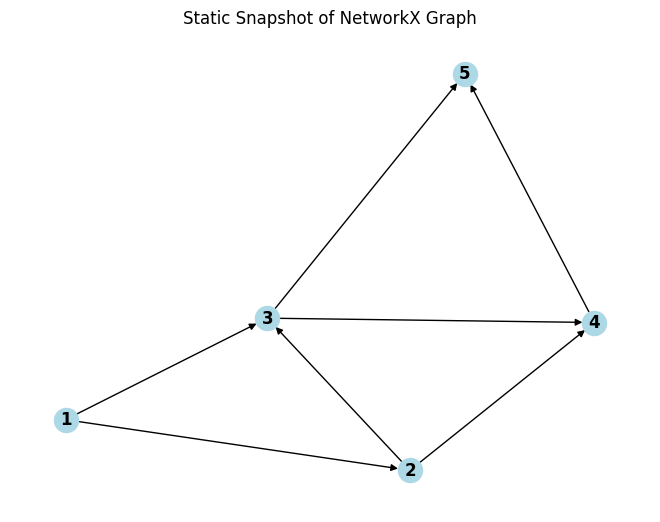

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from scripts.temporal_paths import (
    create_temporal_graph,
    shortest_path,
    fastest_path,
    foremost_path,
    fastest_shortest_path,
    shortest_fastest_path
)

# Холболтын жагсаалт (эхлэл, төгсгөл, эхлэх цаг, дуусах цаг)
edges = [
    (1, 2, 1, 3),
    (2, 3, 2, 4),
    (3, 4, 3, 5),
    (1, 3, 1, 4),
    (2, 4, 4, 6),
    (4, 5, 5, 7),
    (3, 5, 4, 6),
]

# Граф үүсгэх
G = create_temporal_graph(edges)

# Замуудыг хэвлэх
print("Shortest path:", shortest_path(G, 1, 5))
print("Fastest path:", fastest_path(G, 1, 5))
print("Foremost path:", foremost_path(G, 1, 5))
print("Fastest Shortest path:", fastest_shortest_path(G, 1, 5))
print("Shortest Fastest path:", shortest_fastest_path(G, 1, 5))

# Графыг зургаар дүрслэх
nx.draw(G, with_labels=True, node_color="skyblue", font_weight="bold", edge_color="gray")
plt.title("Temporal Directed Graph")
plt.show()

**4. Дүгнэлт**

  - Хамгийн богино зам нь хамгийн бага зангилаа дамжсан маршрут юм.

  - Хамгийн хурдан зам нь хамгийн бага хугацаанд хүрэх маршрут.

  - Хамгийн түрүүнд хүрэх зам нь хүрэх боломжтой хамгийн эхний маршрут.

  - Хамгийн хурдан богино зам нь богино замуудаас хамгийн хурдан нь.

  - Хамгийн богино хурдан зам нь хурдан замуудаас хамгийн бага зангилаа дамжсан нь.